In [2]:
#importing needed lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#read train and test data 
train = pd.read_csv('train-data.csv')
test = pd.read_csv('test-data.csv')
print('shape of trian: ', train.shape)
print('shape of test: ', test.shape)

shape of trian:  (6019, 14)
shape of test:  (1234, 13)


In [17]:
#concat both data

data = pd.concat([train,test],sort=False)
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [246]:
#checking shape of data
data.shape


(7253, 21)

In [19]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2601.948435,2013.365366,5.869906e+04,5.279722,9.479468
std,1826.365869,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,906.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,2392.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,4205.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [76]:
#Feature Engennering 
for i in range(data.shape[0]):
    data['company'][i] = data.iloc[i,1].split()[0]
    data['milege in kmpl'][i] = data.iloc[i,8].split()[0]
    data['engine in cc'][i] = data.iloc[i,9].split()[0]
    data['power in bhp'][i] = data.iloc[i,10].split()[0]
    
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

AttributeError: 'float' object has no attribute 'split'

In [111]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,company,milege,engine,power,milege in kmpl,engine in cc,power in bhp
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.6,998,58.16,26.6,998,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582,126.2,19.67,1582,126.2
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.2,1199,88.7,18.2,1199,88.7
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248,88.76,20.77,1248,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.2,1968,140.8,15.2,1968,140.8


In [78]:
# unwanted columns
removing_cols = ['Unnamed: 0','Name','Mileage','Engine','Power','milege','engine','power','New_Price']

In [79]:
#removing unwanted columns form data
data1 = data.drop(removing_cols,axis=1)

In [116]:
data1.head(100)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,company,milege in kmpl,engine in cc,power in bhp
0,Mumbai,2010,72000,CNG,Manual,First,Mumbai,1.75,Maruti,26.6,998,58.16
1,Pune,2015,41000,Diesel,Manual,First,Pune,12.50,Hyundai,19.67,1582,126.2
2,Chennai,2011,46000,Petrol,Manual,First,Chennai,4.50,Honda,18.2,1199,88.7
3,Chennai,2012,87000,Diesel,Manual,First,Chennai,6.00,Maruti,20.77,1248,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,Coimbatore,17.74,Audi,15.2,1968,140.8
5,Hyderabad,2012,75000,LPG,Manual,First,Hyderabad,2.35,Hyundai,21.1,814,55.2
6,Jaipur,2013,86999,Diesel,Manual,First,Jaipur,3.50,Nissan,23.08,1461,63.1
7,Mumbai,2016,36000,Diesel,Automatic,First,Mumbai,17.50,Toyota,11.36,2755,171.5
8,Pune,2013,64430,Diesel,Manual,First,Pune,5.20,Volkswagen,20.54,1598,103.6
9,Chennai,2012,65932,Diesel,Manual,Second,Chennai,1.95,Tata,22.3,1248,74


In [98]:
#replacing 'null' with average manually
data1['power in bhp'] = data1['power in bhp'].replace('null',90)

In [108]:
#for showing all rows and columns present in data
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns',None)


In [129]:
data1['Seats'] = data['Seats']


In [133]:
#checking if null value is present or not
data1.isnull().sum()


Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                1234
company                 0
milege in kmpl          0
engine in cc            0
power in bhp            0
dtype: int64

In [131]:
#replacing nan values of seats manually
data1['Seats'] = data1['Seats'].replace(np.nan,6)

In [165]:
data1['Seats'] = data1['Seats'].replace(0.0,4)

In [167]:
data1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,company,milege in kmpl,engine in cc,power in bhp
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.6,998,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582,126.2
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.2,1199,88.7
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.2,1968,140.8


In [146]:
#spliting the data into two part train and test data for visualization
train_data = data1[:6019]

In [147]:
train_data.shape

(6019, 12)

In [148]:
test_data = data1[6019:]

In [149]:
test_data.shape

(1234, 12)

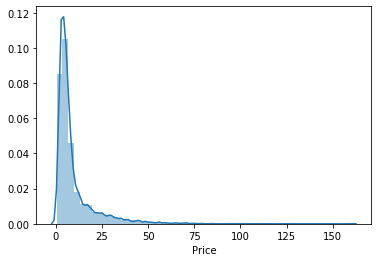

In [151]:
#data visualization
sns.distplot(train_data['Price'])

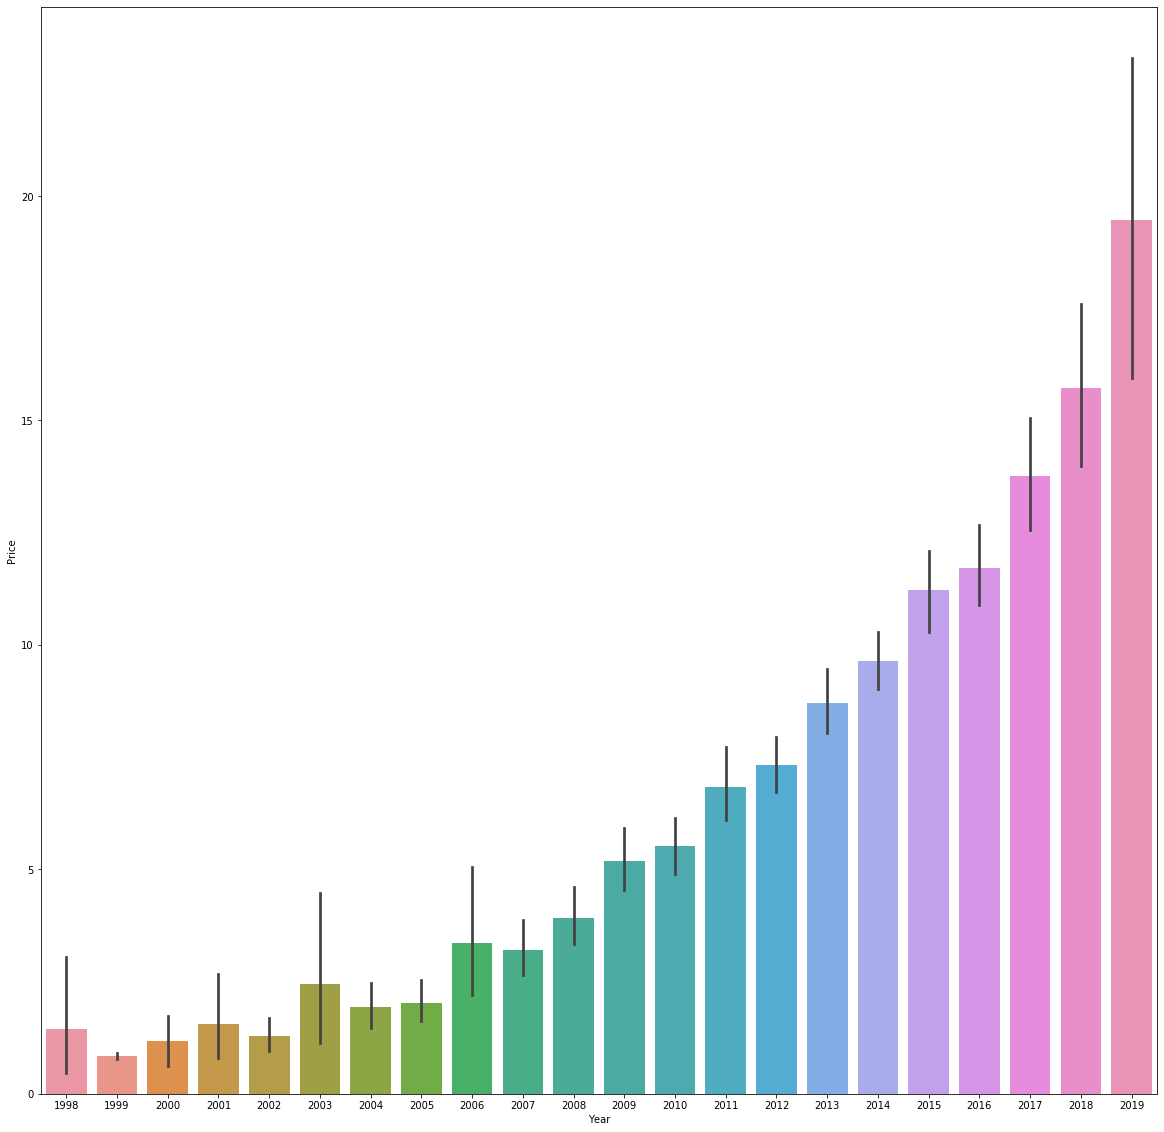

In [155]:
plt.figure(figsize=(20,20))
sns.barplot(x='Year',y='Price',data=train_data)

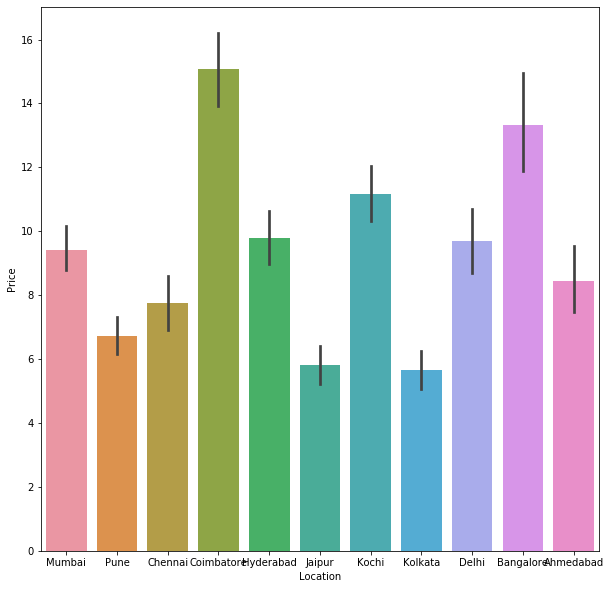

In [157]:
plt.figure(figsize=(10,10))
sns.barplot(x='Location',y='Price',data=train_data)

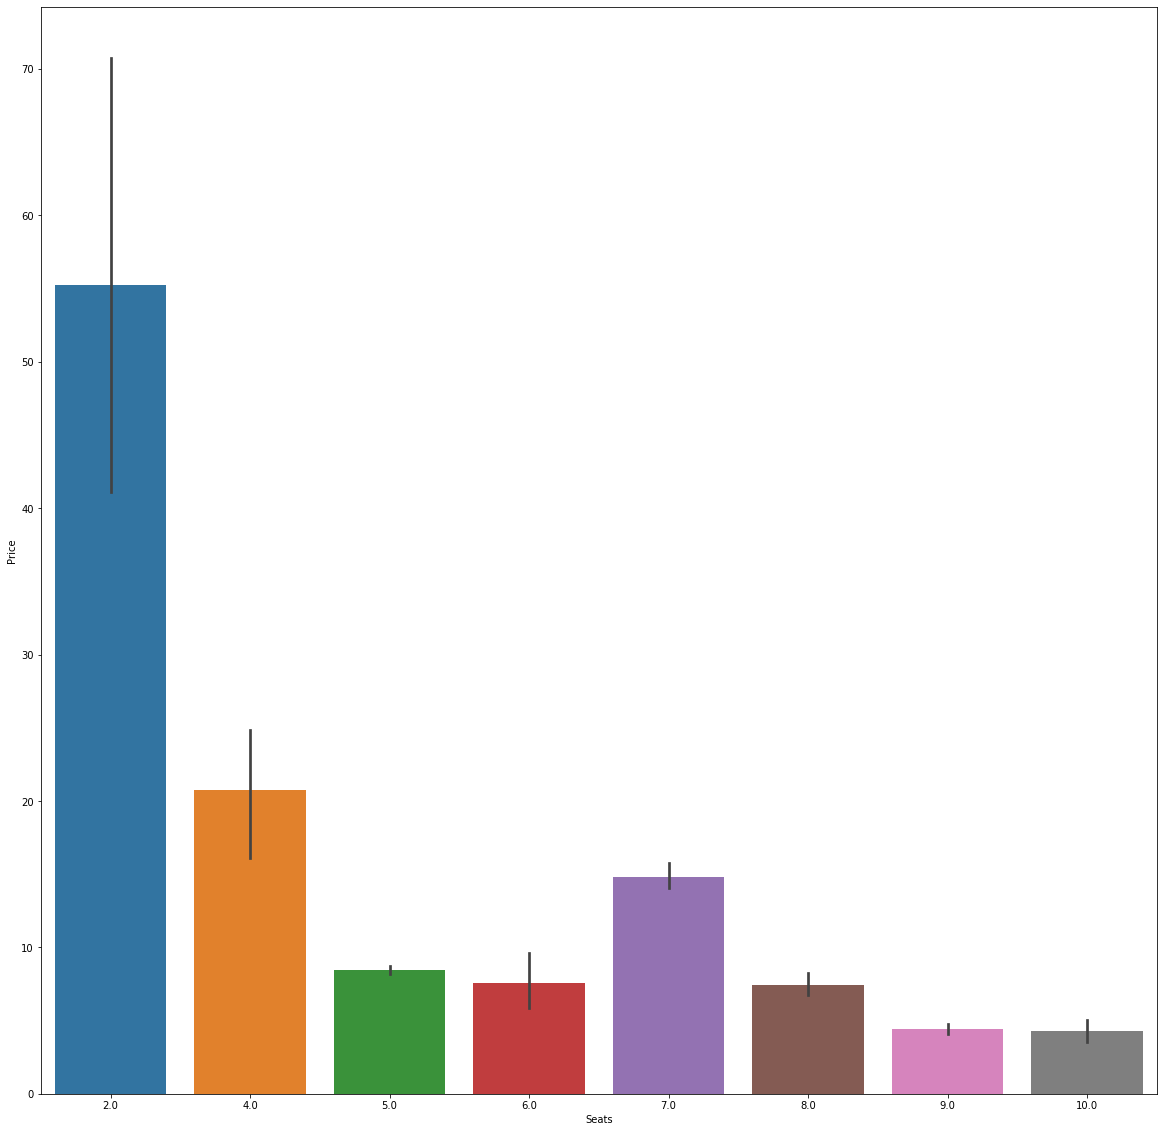

In [168]:
plt.figure(figsize=(20,20))
sns.barplot(x='Seats',y='Price',data=train_data)

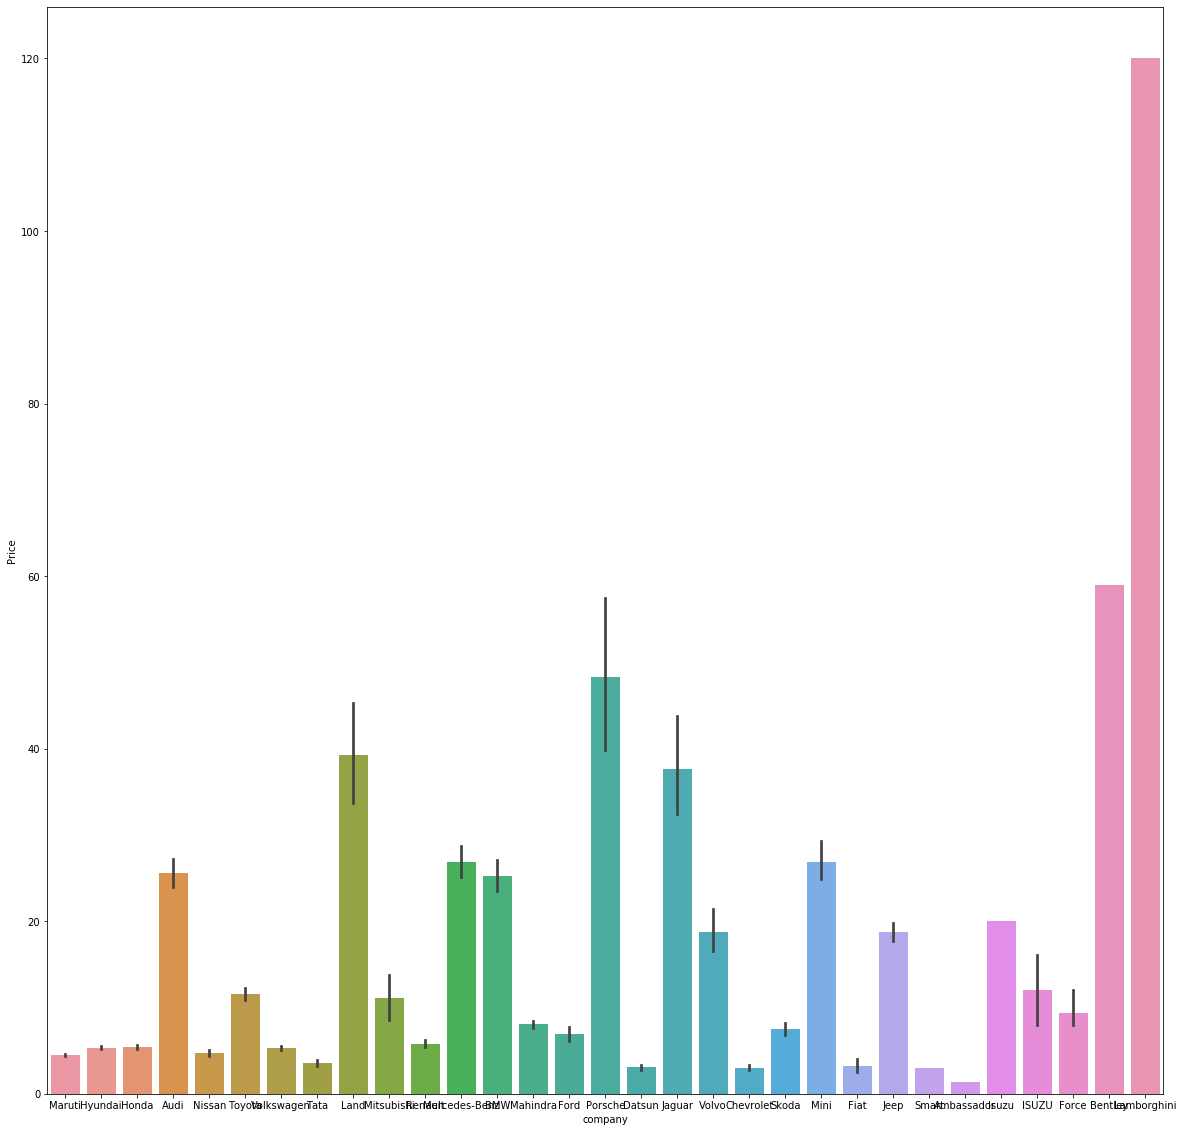

In [161]:
plt.figure(figsize=(20,20))
sns.barplot(x='company',y='Price',data=train_data)

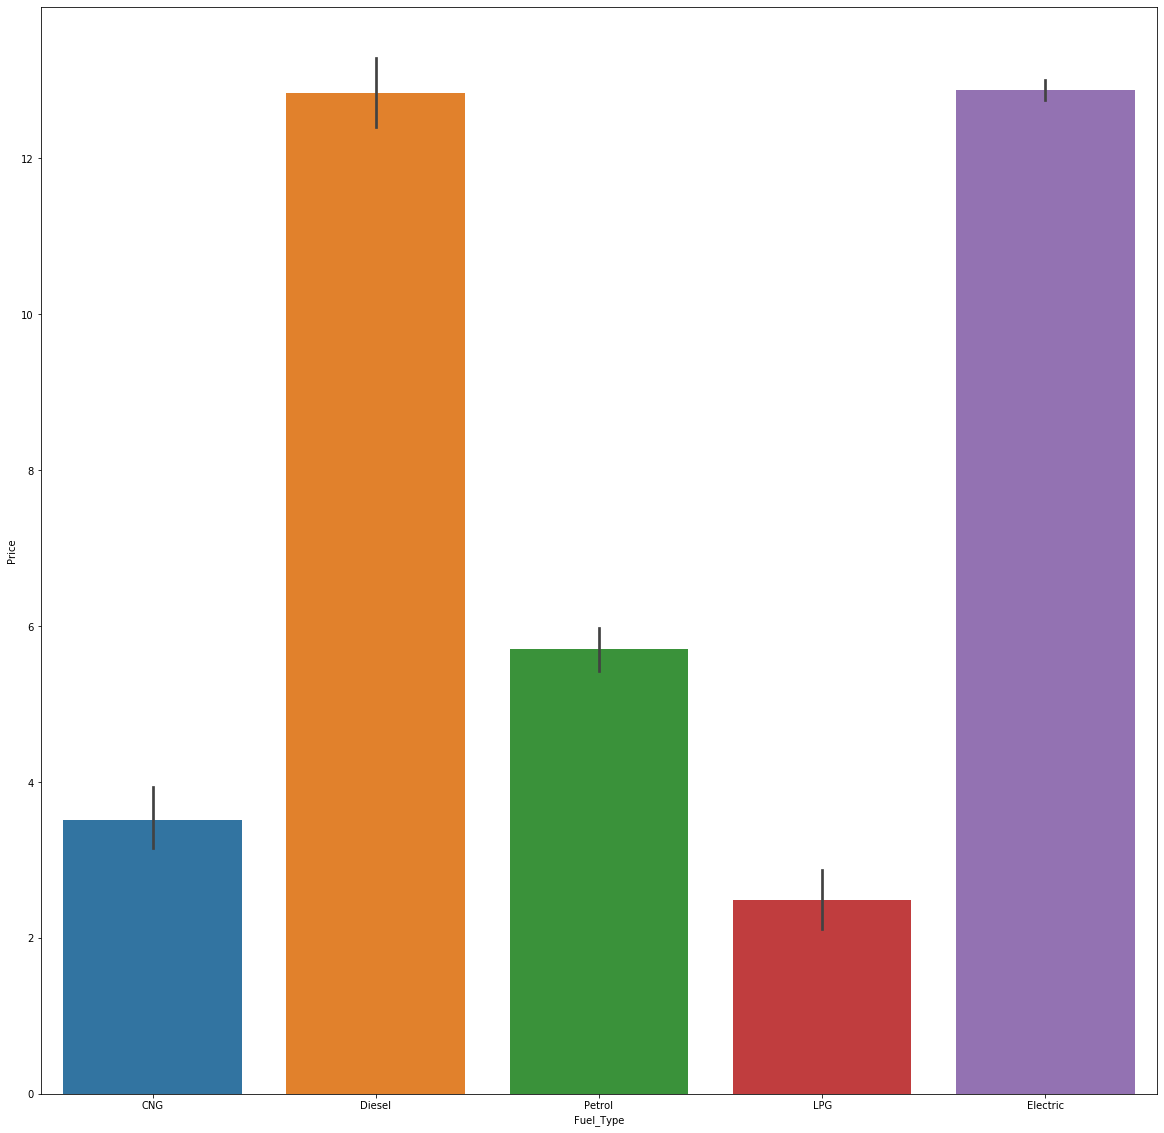

In [162]:
plt.figure(figsize=(20,20))
sns.barplot(x='Fuel_Type',y='Price',data=train_data)

In [247]:
#changing the data type from string to float
data1['milege in kmpl'] = data1['milege in kmpl'].astype(float)
data1['engine in cc'] = data1['engine in cc'].astype(float)
data1['power in bhp'] = data1['power in bhp'].astype(float)

In [185]:
#checking for categorical variable
cat_var = data1.select_dtypes(include=['object']).columns

In [187]:
#working with categorical variable/data
data2 = pd.get_dummies(data1[cat_var],drop_first=True)

In [191]:
data3 = pd.concat([data1,data2],axis=1)

In [192]:
data4 = data3.drop(data3[cat_var],axis=1)

In [193]:
data4.head()

,Year,Kilometers_Driven,Seats,Price,milege in kmpl,engine in cc,power in bhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,company_Audi,company_BMW,company_Bentley,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Honda,company_Hyundai,company_ISUZU,company_Isuzu,company_Jaguar,company_Jeep,company_Lamborghini,company_Land,company_Mahindra,company_Maruti,company_Mercedes-Benz,company_Mini,company_Mitsubishi,company_Nissan,company_Porsche,company_Renault,company_Skoda,company_Smart,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
0,2010,72000,5.0,1.75,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,18.20,1199.0,88.70,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,20.77,1248.0,88.76,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,15.20,1968.0,140.80,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [248]:
#spliting data into two part train and test for machine learning after working on categorial variable/data
X_trains = data4[:6019]
X_train = X_train.drop('Price',axis=1)
X_train.shape

KeyError: "['Price'] not found in axis"

In [201]:
X_test = data4[6019:]
X_test = X_test.drop('Price',axis=1)
X_test.shape

(1234, 54)

In [205]:
y_train = X_trains['Price']

# Linear regression


In [236]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

In [237]:
lin_reg = LinearRegression().fit(X_train,y_train)


In [238]:
p = lin_reg.predict(X_test)

In [239]:
print('accuracy_on_training:',lin_reg.score(X_train,y_train))

accuracy_on_training: 0.7047425450587683


# ExtraTreesRegressor

In [240]:
from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor()
etr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [242]:
p = etr.predict(X_test)

In [243]:
print('accuracy_on_training:',etr.score(X_train,y_train))

accuracy_on_training: 0.9992782572743724
